age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          sex          bmi     children       smoker       region       charges
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025     0.505232    30.663397     1.094918     0.204783     1.515695  13270.422265
std      14.049960     0.500160     6.098187     1.205493     0.403694     1.104885  12110.011237
min      18.000000     0.000000    15.960000     0.000000     0.000000     0.000000   1121.873900
25%      27.000000     0.000000    26.296250     0.000000     0.000000     1.000000   4740.287150
50%      39.000000     1.000000    30.400000     1.000000     0.000000     2.000000   9382.033000
75%      51.000000     1.000000    34.693750     2.000000     0.000000     2.000000  16639.912515
max      64.000000     1.000000    53.130000     5.000000     1.000000     3.000000  63770.428010


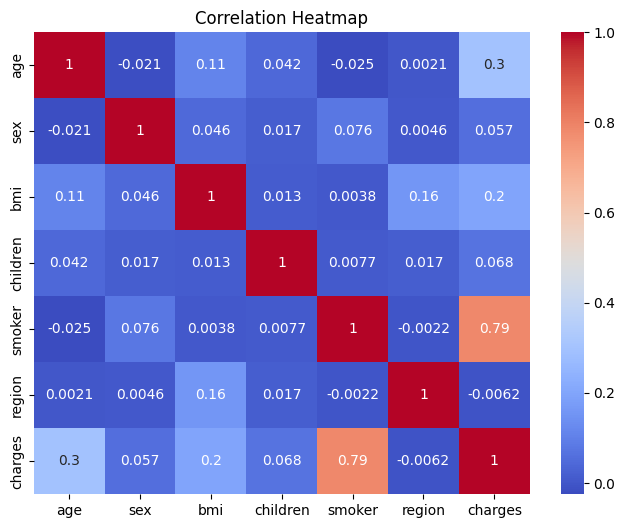

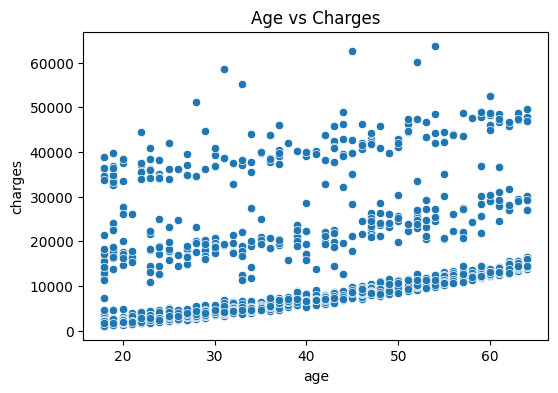

=== Linear Regression ===
R2 Score: 0.7833463107364536
RMSE: 5799.5870914383595

=== Random Forest Regressor ===
R2 Score: 0.8658416529065179
RMSE: 4563.760861975148

=== Comparison Table ===
                Model  R2 Score         RMSE
0  Linear Regression  0.783346  5799.587091
1      Random Forest  0.865842  4563.760862

Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Final Tuned Random Forest R2 Score: 0.872161587365117
Final Tuned Random Forest RMSE: 4454.969292541476


In [8]:
#Task 2 on dataset(D3) Predicting medical insurance costs

# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set display options to avoid output truncation
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# Step 1: Loading Data, Data Pre-processing, EDA

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/HIT391-Tutorial/insurance.csv')

# Data Preprocessing
# Encode categorical variables
le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df[col] = le.fit_transform(df[col])

# Check for missing values
print(df.isnull().sum())  # Should return 0 if data is clean

# Exploratory Data Analysis (EDA)
print(df.describe())
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of charges vs age
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

# Step 2: Feature Engineering, Creating Train, and Test Datasets
# Feature Engineering
X = df.drop('charges', axis=1)  # Independent Variables
y = df['charges']              # Target Variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Apply 2 Regression Algorithms (Training and Testing)
# Algorithm 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Algorithm 2: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 4: Generate 2 Evaluation Metrics on each algorithm

# Linear Regression Metrics
print("=== Linear Regression ===")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Random Forest Metrics
print("\n=== Random Forest Regressor ===")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Step 5: Compare Results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_rf))]
})
print("\n=== Comparison Table ===\n", results)

# Step 6: Fine Tune Best Algorithm (Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:", grid_search.best_params_)

# Final Evaluation with Tuned Model
best_rf = grid_search.best_estimator_
final_preds = best_rf.predict(X_test)
print("Final Tuned Random Forest R2 Score:", r2_score(y_test, final_preds))
print("Final Tuned Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, final_preds)))

